In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Partisan-Responses-master')

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Presidency Project
### News Conference

In [4]:
conf = pd.read_csv("data/presidency_project/president_newsconference.csv")
conf.head()

,id,question,answer,answerer_name,party,date
0,0,[,"The President. It was not good, right? But in ...",Donald J. Trump,Republican,NaN
1,0,"Thank you, sir. Last Wednesday, when you were ...",The President. Yes.\n,Donald J. Trump,Republican,NaN
2,0,Do you hope that Amy Coney Barrett is watching...,The President. I do. I'm sure she is. I think ...,Donald J. Trump,Republican,NaN
3,0,A quick follow-up. Did you discuss the electio...,"The President. No, I didn't. I didn't.\n",Donald J. Trump,Republican,NaN
4,0,"And then, just one——\n",The President. I just didn't think it would be...,Donald J. Trump,Republican,NaN


In [9]:
for i in conf.answer.values[:10]:
    print(i)
    print()

The President. It was not good, right? But in Iowa, they still don't really know who the winner was. I think they called somebody eventually, but it was many, many weeks later. But they really have no idea, and that's being—continues to be—and that's little; that's just a small—it continues to be litigated in Iowa. They can't run a simple caucus, yet now they're trying to radically write election laws nationwide, just weeks before the presidential election.
 I heard in New York today that Governor Cuomo wants to try and simplify the ballots because he thinks they're too complicated. And all of that, I agree with him. I think that's good. But you don't do that now. The ballots are starting to come in. And you know, you can't do it now. It's too late.
 Joe Biden and the Democrat extremists oppose all of these efforts to ensure election integrity. They oppose voter ID. Think of it: Voter ID. They want a picture. They have a picture for almost everything nowadays, but they don't want a pic

## Speeches
### 111 th bound edition 
### 1. Bigrams
- **By party** 
- By Congressperson

In [3]:
# Partisan bigram
party2gram = pd.read_table("../hein-bound/byparty_2gram_111.txt", sep = "|")
party2gram.head()

,party,phrase,count
0,D,0 0,29
1,D,0 000,1
2,D,0 01,1
3,D,0 0100,1
4,D,0 02,1


### 2. Speech related
- **Speech Metadata**
- **Full text**
- Speaker Metadata

In [2]:
# Speech Meta
speechmeta = pd.read_table("../hein-bound/descr_111.txt", sep = "|")
speechmeta.head()

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,1110000001,H,20090106,1,The CLERK,Unknown,Unknown,Unknown,Special,66,70,01062009.txt,107,16
1,1110000002,H,20090106,2,The CLERK,Unknown,Unknown,Unknown,Special,77,100,01062009.txt,836,134
2,1110000003,H,20090106,3,The CLERK,Unknown,Unknown,Unknown,Special,565,591,01062009.txt,219,37
3,1110000004,H,20090106,4,The CLERK,Unknown,Unknown,Unknown,Special,593,613,01062009.txt,596,92
4,1110000005,H,20090106,5,The CLERK,Unknown,Unknown,Unknown,Special,616,622,01062009.txt,200,34


In [3]:
hein_bound_direc = "../hein-bound/"
daily_bound_direc = "../daily-bound"
hein_bound_files = os.listdir(hein_bound_direc)
hein_meta_files = []
for f in hein_bound_files:
    if f.startswith("descr"):
        hein_meta_files.append(os.path.join(hein_bound_direc,f))
hein_meta_files.sort()

In [30]:
char_count = []
word_cound = []
num_speeches = []            
for f in hein_meta_files:
    df = pd.read_table(f, sep = "|", encoding="latin")
    char_count += df["char_count"].tolist()
    word_cound += df["word_count"].tolist()
    num_speeches.append(df.shape[0])

In [33]:
x = [os.path.splitext(os.path.split(i)[-1])[0].split("_")[-1] for i in hein_meta_files]

<BarContainer object of 69 artists>

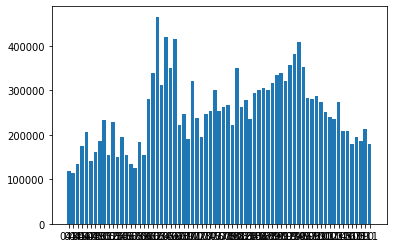

In [36]:
plt.bar(x,num_speeches)

In [41]:
sum(word_cound)/len(word_cound)

106.39143265153987

In [2]:
import spacy
from spacy import displacy
import nltk

In [3]:
filepath = "../hein-bound/speeches_111.txt"
with open(filepath, errors="ignore") as f:
    speech = f.readlines()
    speech = [s.replace("\n", "").replace(" | ", " ").split("|") for s in speech]
df = pd.DataFrame(speech[1:], columns = speech[0]).head()            

In [4]:
df.head()

,speech_id,speech
0,1110000001,The Representativeselect and their guests will...
1,1110000002,As directed by law. the Clerk of the House has...
2,1110000003,The quor closes that 428 Represer have respond...
3,1110000004,Credentials. regular in form. have been receiv...
4,1110000005,The Clerk is in receipt of a letter of resigna...


In [5]:
with open("../hein-bound/111_SpeakerMap.txt", errors="ignore") as f:
    speakermap_df = pd.read_table(f, delimiter = "|")

In [6]:
speakermap_df.head()

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting
0,111120160,1110000007,LARSON,JOHN,H,CT,M,D,1.0,voting
1,111117010,1110000009,PENCE,MIKE,H,IN,M,R,6.0,voting
2,111118060,1110000013,BOEHNER,JOHN,H,OH,M,R,8.0,voting
3,111120780,1110000014,PELOSI,NANCY,H,CA,F,D,8.0,voting
4,111119830,1110000015,HOYER,STENY,H,MD,M,D,5.0,voting


In [7]:
def read_full_speech(filepath):
    with open(filepath, errors="ignore") as f:
        speech = f.readlines()
        speech = [s.replace("\n", "").replace(" | ", " ").split("|") for s in speech]#Full speech
        speech_df = pd.DataFrame(speech[1:], columns=speech[0])
    return speech_df

def read_speakermap(filepath):
    with open(filepath, errors="ignore") as f:
        speakermap_df = pd.read_table(f, delimiter = "|")
    return speakermap_df

def merge_speech_speaker(speech_df, speaker_df):
    speech_df = speech_df.astype({"speech_id": type(speaker_df.loc[:,'speech_id'][0])})
    return speaker_df.merge(speech_df, on="speech_id", how="left")

def get_speeches_filename(idx):
    return "speeches_{}.txt".format(idx)

def get_speakermap_filename(idx):
    return "{}_SpeakerMap.txt".format(idx)

def lemmatize(phrase):
    return " ".join([word.lemma_ for word in sp(phrase)])

In [8]:
filepath = "../hein-bound/{}".format(get_speeches_filename(111))
speech_df = read_full_speech(filepath)

filepath = "../hein-bound/{}".format(get_speakermap_filename(111))
speaker_df = read_speakermap(filepath)

final_df = merge_speech_speaker(speech_df, speaker_df)
final_df.head()

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting,speech
0,111120160,1110000007,LARSON,JOHN,H,CT,M,D,1.0,voting,Our democracy renews itself every 2 years as M...
1,111117010,1110000009,PENCE,MIKE,H,IN,M,R,6.0,voting,Madam Clerk. as chairman of the Republican Con...
2,111118060,1110000013,BOEHNER,JOHN,H,OH,M,R,8.0,voting,Madam Speaker. Leader HOYER. fellow Members. a...
3,111120780,1110000014,PELOSI,NANCY,H,CA,F,D,8.0,voting,Thank you very much. Leader BOEHNER. Together....
4,111119830,1110000015,HOYER,STENY,H,MD,M,D,5.0,voting,Mr. CLYBURN. thank you.


In [13]:
df_merged = pd.concat([final_df, final_df.shift(-1).add_prefix('next_')], axis=1)

In [14]:
df_merged.head()

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting,...,next_speech_id,next_lastname,next_firstname,next_chamber,next_state,next_gender,next_party,next_district,next_nonvoting,next_speech
0,111120160,1110000007,LARSON,JOHN,H,CT,M,D,1.0,voting,...,1.110000e+09,PENCE,MIKE,H,IN,M,R,6.0,voting,Madam Clerk. as chairman of the Republican Con...
1,111117010,1110000009,PENCE,MIKE,H,IN,M,R,6.0,voting,...,1.110000e+09,BOEHNER,JOHN,H,OH,M,R,8.0,voting,Madam Speaker. Leader HOYER. fellow Members. a...
2,111118060,1110000013,BOEHNER,JOHN,H,OH,M,R,8.0,voting,...,1.110000e+09,PELOSI,NANCY,H,CA,F,D,8.0,voting,Thank you very much. Leader BOEHNER. Together....
3,111120780,1110000014,PELOSI,NANCY,H,CA,F,D,8.0,voting,...,1.110000e+09,HOYER,STENY,H,MD,M,D,5.0,voting,Mr. CLYBURN. thank you.
4,111119830,1110000015,HOYER,STENY,H,MD,M,D,5.0,voting,...,1.110000e+09,LARSON,JOHN,H,CT,M,D,1.0,voting,for your nomination this morning. Thank you to...


In [15]:
speeches_with_questions = df_merged.loc[df_merged['speech'].str.contains('\?')]

In [16]:
speeches_with_questions[['speech', 'next_speech']].head(15)

,speech,next_speech
29,Will the gentlewoman yield?,I yield back the balance of my time.
36,Mr. Speaker. I thank the gentleman. Mr. Speake...,Mr. Speaker. I reserve my time.
39,I thank the gentleman very much. Mr. Speaker. ...,Mr. Speaker. I am pleased to yield 2 minutes t...
41,The gentleman from Wisconsin said. why will th...,Mr. Speaker. at this time I am happy to yield ...
43,Mr. Speaker. the Republican Members of the 111...,Mr. Speaker. please let me yield myself 1 or 2...
46,Mr. Speaker. may I inquire of the gentlewoman ...,I dont have any further requests for time. or ...
61,Mr. Speaker. I would just like to say that It ...,I am.
110,Mr. President. are we now in a period of morni...,Mr. President. on the Fourth of July of the ye...
125,Mr. President. I rise for a few moments to add...,Thank you. Mr. President. And I say to Senator...
126,Thank you. Mr. President. And I say to Senator...,Mr. President. would it be in order for me. be...


In [17]:
for i in range(50):
    print("Question: ", speeches_with_questions.iloc[i].speech)
    print("Answer: ", speeches_with_questions.iloc[i].next_speech)
    print()

Question:  Will the gentlewoman yield?
Answer:  I yield back the balance of my time.

Question:  Mr. Speaker. I thank the gentleman. Mr. Speaker. you dont have to look far to see that families across this country are gripped with a tremendous amount of fear and uncertainty. They fear for their jobs. if they have one. They fear for their future as they see their 401(k)s. their college savings accounts collapse. They fear that their elected leaders dont get it. They fear that this Congress may very well be incapable of change. incapable of producing the kind of results that they want and to get it right. Under existing House rules. when a bill is brought to the floor that includes a tax increase. the minority has a right to offer a motion to strike that increase. and the Republican minority had done that on nearly half a dozen occasions over the past 2 years. With this rule change now. though. House Democrats are trying to push through what we Republicans will no longer have. the ability

In [5]:
spwithq=[q for q in speech if q[1].find("?")+1] #speech having questions
spwithq = [[q[0], nltk.sent_tokenize(q[1])] for q in spwithq] # split speech in sentences

In [6]:
questions = [[i[0], [q for q in i[1] if q.find("?")+1]] for i in spwithq]

In [7]:
q_corpus = []
for q in questions:
    q_corpus += q[1]
q_corpus = list(set(q_corpus))
q_corpus.sort()

In [8]:
q_corpus

['"-and we mean it?"',
 '"374?',
 '"Am I missing something?"',
 '"And Aint I a Women?"',
 '"And how do we develop missions and provide resources so that we are using all of our capabilities on behalf of our national security?"',
 '"And how were you recorded?"',
 '"And in 3 years it disappears?"',
 '"Are American taxpayers getting what they paid for?"',
 '"Are Mini Med Policies Really Health Insurance?"',
 '"Are Republicans Serious About Fixing Health Care?',
 '"Are We Ready?',
 '"Are You Smarter than a FifthGrader?"',
 '"Are these people charged with immigration violations or are they charged with other crimes?"',
 '"Are these people going to take away bonuses that taxpayers have paid for?"',
 '"Are we in for a tax hike?"',
 '"Are we now going to be expected to pay for someone elses losses when Im struggling to keep paying my own mortgage?"',
 '"Are we there yet?"',
 '"Are we willing?"',
 '"Are you a fighter?',
 '"Are you aware there is up to a 50 percent tax credit for every insurance

In [92]:
sample_speech = speech[341]
nlp = spacy.load("en_core_web_sm")
doc = nlp(sample_speech[1])
displacy.serve(doc, style="ent")

/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


ParserError if directly read from original file

## Vocabulary

## Topics

In [ ]:
topic_phrases = pd.read_table("./data/topic_phrases.txt", delimiter="|")

In [ ]:
topic_phrases.head(20)

## Partisan Phrases
1000 most partisan bigrams in each session

In [ ]:
with open("../hein-bound/partisan_phrases_111.txt") as f:
    partisan_phrases_111 = f.read()

In [134]:
import requests
import os
import urllib

## Naive query to Concept Web API

In [159]:
token = "c/en/antisaloon"
api_path = "http://api.conceptnet.io"
query_path = urllib.parse.urljoin(api_path, token)
print()
print(query_path)
keep_query = True
graph = []
while keep_query:
    query = requests.get(query_path)
    if query.status_code == 200:
        results = query.json()
        if "error" not in results.keys():
            graph += results["edges"]
            if "view" in results.keys() and "nextPage" in results['view'].keys():
                print("Continue to query next page...")
                np = results['view']['nextPage']
                query_path = urllib.parse.urljoin(api_path, np)
                print(query_path)
            else:
                keep_query = False
                print("All pages of {} queried!".format(token))
                
    


http://api.conceptnet.io/c/en/antisaloon
All pages of c/en/antisaloon queried!


In [158]:
results.keys()

dict_keys(['@context', '@id', 'edges'])